# A Customer Churn Prediction
### Project Scenario
Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

Classification in machine learning and statistics entails a supervised learning approach where the computer program learns from provided data to make new observations or classifications. The primary objective is to determine the class or category into which new data points will fall. In this project scenario, an elaborate analysis will be conducted to train at least four models for predicting customer churn in a telecom company. This analysis will adhere to the **CRISP-DM framework**, ensuring a structured and systematic approach to model development and evaluation.

##### In this project I will be using the CRISP-DM Frame work for analysis
## Step 1- Business Understanding
1. Objectives:
- Thoroughly understand the business perspective of customer retention and increasing profit/revenue margins.
- Define specific objectives such as reducing customer churn rate by a certain percentage or increasing customer lifetime value.

2. Assess the Situation:
- Evaluate resource availability including human resources, data availability, computing resources, and budget constraints.
- Identify project requirements such as data quality, data sources, and any legal or ethical considerations.
- Assess risks and contingencies related to data privacy, model accuracy, and implementation challenges.
- Conduct a cost-benefit analysis to understand the potential return on investment (ROI) of the project.

3. Determine Data Mining Goals:
- Define technical goals such as building a classification model to predict customer churn with high accuracy.
- Specify success criteria for the data mining process, including model performance metrics (e.g., accuracy, precision, recall) and business impact metrics (e.g., cost savings, revenue increase).

4. Produce Project Plan:
- Select appropriate technologies and tools for data collection, preprocessing, modeling, and evaluation (e.g., Python for data analysis, scikit-learn for machine learning, etc.).
- Define a detailed project plan with timelines, milestones, and responsibilities for each phase of the project (e.g., data collection, data preprocessing, model training, model evaluation, deployment).
- Ensure alignment with stakeholders and obtain necessary approvals for the project plan.

### Hypothesis
Hypothesis 1
Null Hypothesis (Ho): Customers with longer tenure (number of months stayed with the company) are less likely to churn compared to new customers.
Alternative Hypothesis (Ha): Customers with longer tenure (number of months stayed with the company) are more likely to churn compared to new customers.

Hypothesis 2
Null Hypothesis (Ho): Customers with higher monthly charges (MonthlyCharges) are more likely to churn due to cost considerations.
Alternative Hypothesis (Ha): Customers with higher monthly charges (MonthlyCharges) are less likely to churn due to cost considerations.

### Business Questions
1. What is the average tenure of customers who churned compared to those who stayed?
2. Do customers with partners or dependents have a lower churn rate?
3. How does the presence of multiple lines affect customer churn?
4. Is there a correlation between the contract term (Contract) and customer churn?
5. What are the common payment methods (Payment Method) among customers who churned?
6. Are customers with higher monthly charges more likely to churn?
7. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?
8. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
9. Is there a difference in churn rates between senior citizens and non-senior citizens?
10. How does the total amount charged to customers (TotalCharges) correlate with churn behavior?

In [2]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                      
import re     
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statistics as stat 
from scipy.stats import mannwhitneyu
from scipy import stats            
from scipy.stats import ttest_ind  
from matplotlib.ticker import FuncFormatter  
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


## Step 2 - Data Understanding
The data for this project is in differnt files and will be loaded into the notebook. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

#### First Dataset
I'm using Python's dotenv with a .env file to safely fetch the first dataset from a SQL database into my notebook. This keeps my database credentials private while allowing easy access to the data for analysis.

In [11]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [12]:
# Create a connection string
connection_string = f"Driver={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [13]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [17]:
# Sql query to get the 2020 data
query = "Select * FROM LP2_Telco_churn_first_3000"
First_Dataset = pd.read_sql(query, connection)

In [41]:
# Preview of the first Data set 
First_Dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [19]:
First_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


#### Second Dataset
I obtained the second dataset from a GitHub repository, and I'll use Pandas to import the CSV file into my notebook for analysis.

In [20]:
# Loading the second dataset into the notebook
Second_Dataset = pd.read_csv("My data\LP2_Telco-churn-second-2000.csv")

In [42]:
Second_Dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [23]:
Second_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


#### Third Dataset
I obtained the third dataset from a OneDrive file, and I will use Pandas to import the Excel file into the notebook for analysis.

In [26]:
# Loading the second dataset into the notebook
Third_Dataset = pd.read_excel(r"My data\Telco-churn-last-2000.xlsx")


In [43]:
Third_Dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


In [28]:
Third_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [30]:
# Checking if the first and second Dataset have the same column names for easy concatenation
# Get the column names from each DataFrame
columns_First_Dataset = set(First_Dataset.columns)
columns_Second_Dataset = set(Second_Dataset.columns)

# Check if all DataFrames have the same column names
if columns_First_Dataset == columns_Second_Dataset:
    print("All DataFrames have the same column names.")
else:
    print("Not all DataFrames have the same column names.")

All DataFrames have the same column names.


Concatenating the first and second Dataset to prepare them for analysis and training

In [35]:
train_df = pd.concat([First_Dataset, Second_Dataset], ignore_index=True)

In [36]:
train_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False


In [39]:
# Change all column names to lowercase
train_df.columns = train_df.columns.str.lower()

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 


In [44]:
train_df.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          5
churn                 1
dtype: int64

In [47]:
train_df.describe(include ="all")

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,5043,5043,5043.000000,5043,5043,5043.000000,5043,4774,5043,4392,...,4392,4392,4392,4392,5043,5043,5043,5043.000000,5038.000000,5042
unique,5043,2,NaN,4,4,NaN,4,5,3,5,...,5,5,5,5,3,4,4,NaN,4884.000000,4
top,7590-VHVEG,Male,NaN,False,False,NaN,True,False,Fiber optic,False,...,False,False,False,True,Month-to-month,True,Electronic check,NaN,20.200001,False
freq,1,2559,NaN,1538,2070,NaN,2731,1437,2248,1478,...,1296,1476,1190,1199,2744,1776,1700,NaN,5.000000,2219
mean,NaN,NaN,0.162403,NaN,NaN,32.576641,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.090214,NaN,NaN
std,NaN,NaN,0.368857,NaN,NaN,24.529807,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.068133,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.775000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.550003,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.050003,NaN,NaN


### Bivariate Analysis:
Gender vs. Churn 

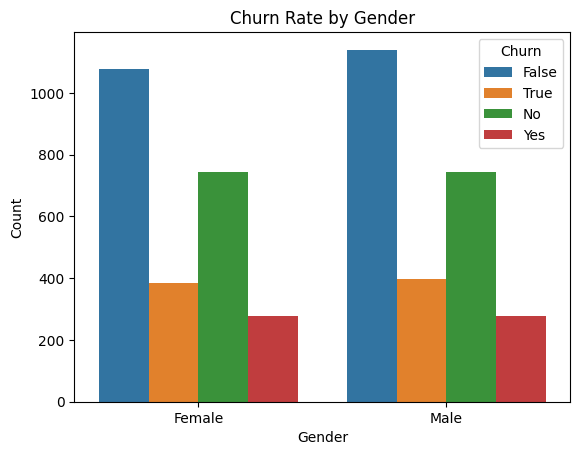

In [68]:
# Bivariate analysis: Gender vs. Churn
sns.countplot(data=train_df, x='gender', hue='churn')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

SeniorCitizen vs. MonthlyCharges

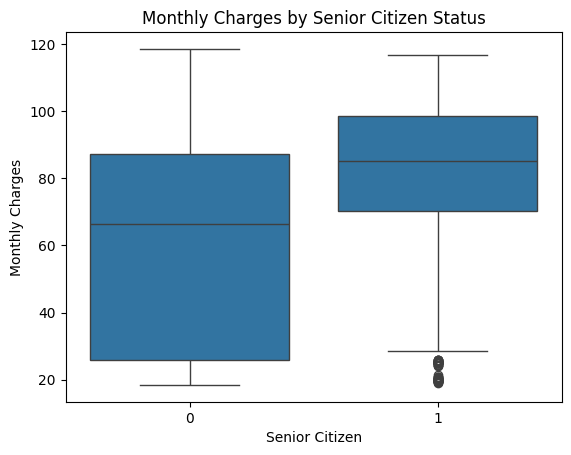

In [51]:
# Bivariate analysis: SeniorCitizen vs. MonthlyCharges
sns.boxplot(data=train_df, x='seniorcitizen', y='monthlycharges')
plt.title('Monthly Charges by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Monthly Charges')
plt.show()

Partner vs. Tenure

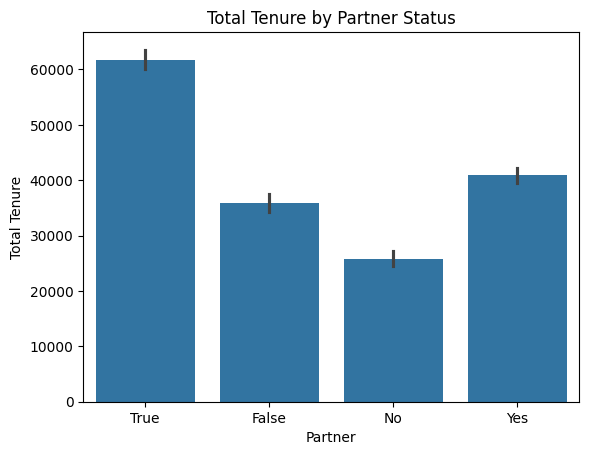

In [70]:
# Bivariate analysis: Partner vs. Tenure
sns.barplot(data=train_df, x='partner', y='tenure', estimator=sum)
plt.title('Total Tenure by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Total Tenure')
plt.show()

### Multivariate Analysis:

Gender, SeniorCitizen vs. Churn

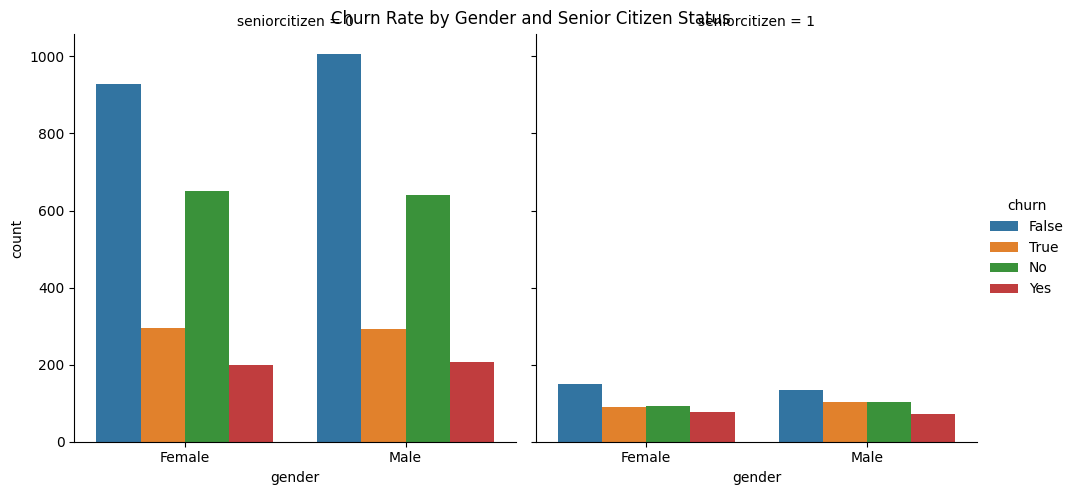

In [55]:
# Multivariate analysis: Gender, SeniorCitizen vs. Churn
sns.catplot(data=train_df, x='gender', hue='churn', col='seniorcitizen', kind='count')
plt.suptitle('Churn Rate by Gender and Senior Citizen Status')
plt.show()

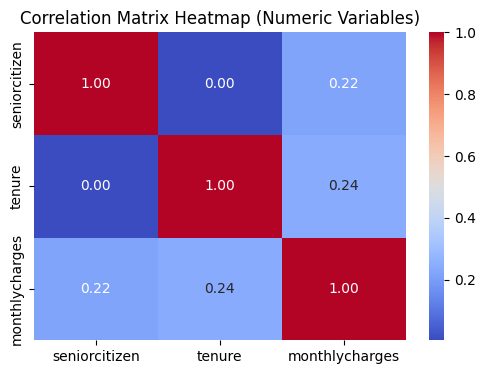

In [65]:
# Separate numeric and categorical columns
numeric_columns = train_df.select_dtypes(include=['number']).columns
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns

# Correlation Matrix and Heatmap for Numeric Variables
numeric_df = train_df[numeric_columns]
numeric_correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Numeric Variables)')
plt.show()

InternetService, OnlineSecurity vs. MonthlyCharges

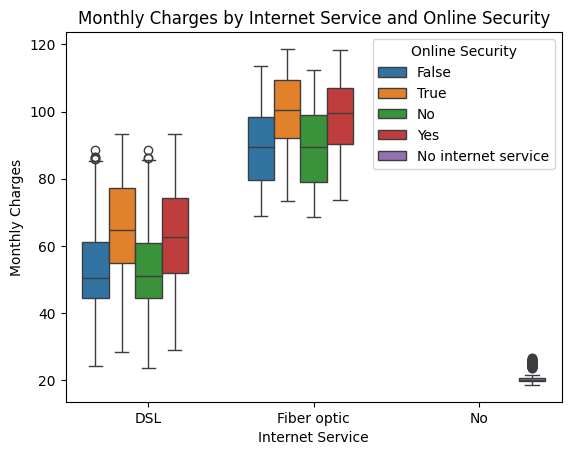

In [56]:
# Multivariate analysis: InternetService, OnlineSecurity vs. MonthlyCharges
sns.boxplot(data=train_df, x='internetservice', y='monthlycharges', hue='onlinesecurity')
plt.title('Monthly Charges by Internet Service and Online Security')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
plt.legend(title='Online Security', loc='upper right')
plt.show()

Contract, PaperlessBilling vs. Tenure

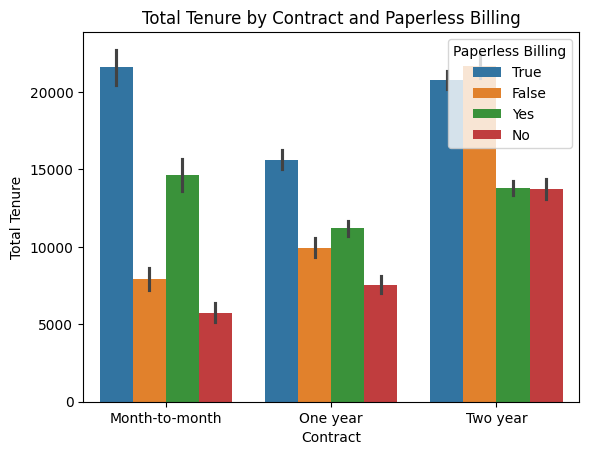

In [57]:
# Multivariate analysis: Contract, PaperlessBilling vs. Tenure
sns.barplot(data=train_df, x='contract', y='tenure', hue='paperlessbilling', estimator=sum)
plt.title('Total Tenure by Contract and Paperless Billing')
plt.xlabel('Contract')
plt.ylabel('Total Tenure')
plt.legend(title='Paperless Billing', loc='upper right')
plt.show()

In [73]:
train_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [74]:
#Check for uniques
cols= [ 'customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


results = []

for i in cols:
    
    unique_values = train_df[i].unique()
    num_unique_values = train_df[i].nunique()
    
    
    results.append([i, unique_values, num_unique_values])


results_df = pd.DataFrame(results, columns=['Column', 'Unique_Values', 'Num_Unique_Values'])


results_df

,Column,Unique_Values,Num_Unique_Values
0,customerid,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,seniorcitizen,"[0, 1]",2
3,partner,"[True, False, No, Yes]",4
4,dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,phoneservice,"[False, True, Yes, No]",4
7,multiplelines,"[None, False, True, No, No phone service, Yes]",5
8,internetservice,"[DSL, Fiber optic, No]",3
9,onlinesecurity,"[False, True, None, No, Yes, No internet service]",5


In [ ]:
# Define the mapping for standardization
standardize_mapping = {
    'No phone service': 'No',
    'No internet service': 'No',
    'True': 'Yes',
    'False': 'No',
    'None': pd.NA,
    'none': pd.NA
}

# Columns to perform standardization
cols_to_standardize = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                       'streamingtv', 'streamingmovies', 'paperlessbilling', 'churn',
                       'phoneservice', 'multiplelines', 'partner', 'dependents']

# Loop through columns for standardization
for col in cols_to_standardize:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].replace(standardize_mapping)

# Show the updated DataFrame
train_df

